In [1]:
#youtube : https://www.youtube.com/watch?v=H6du_pfuznE&t=1599s
#gitub : https://github.com/krishnaik06/Stock-MArket-Forecasting/blob/master/Untitled.ipynb

In [2]:
### Data Collection
import pandas_datareader as pdr
import pandas as pd
key=""

In [3]:
df = pd.read_csv(r'C:\Users\rtekem\OneDrive - Vishay Intertechnology, Inc\Desktop\Machine_Learning_project\Time series Analysis\LSTM\IMPUT\AAPL.csv')

In [4]:
df.head(5)

,Unnamed: 0,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,0,AAPL,2015-05-27 00:00:00+00:00,132.045,132.260,130.05,130.34,45833246,121.682558,121.880685,119.844118,120.111360,45833246,0.0,1.0
1,1,AAPL,2015-05-28 00:00:00+00:00,131.780,131.950,131.10,131.86,30733309,121.438354,121.595013,120.811718,121.512076,30733309,0.0,1.0
2,2,AAPL,2015-05-29 00:00:00+00:00,130.280,131.450,129.90,131.23,50884452,120.056069,121.134251,119.705890,120.931516,50884452,0.0,1.0
3,3,AAPL,2015-06-01 00:00:00+00:00,130.535,131.390,130.05,131.20,32112797,120.291057,121.078960,119.844118,120.903870,32112797,0.0,1.0
4,4,AAPL,2015-06-02 00:00:00+00:00,129.960,130.655,129.32,129.86,33667627,119.761181,120.401640,119.171406,119.669029,33667627,0.0,1.0


In [5]:
df1=df['close']

In [6]:
df1

0       132.045
1       131.780
2       130.280
3       130.535
4       129.960
         ...   
1253    314.960
1254    313.140
1255    319.230
1256    316.850
1257    318.890
Name: close, Length: 1258, dtype: float64

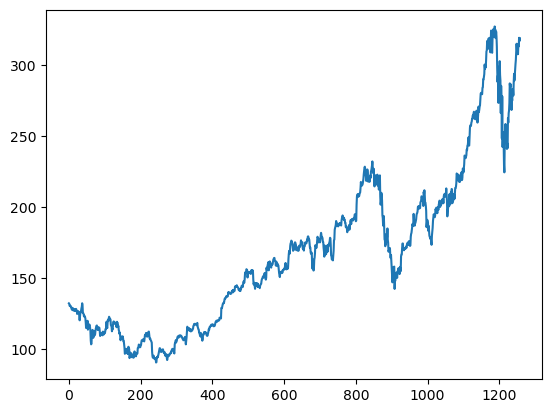

In [7]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [8]:
### LSTM are sensitive to the scale of the data. so we apply MinMax scaler 

In [9]:

import numpy as np

In [10]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [11]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [12]:
training_size,test_size

(817, 441)

In [13]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
import numpy as np

# Définition du time_step (longueur de la séquence)
time_step = 100
batch_size = 1  # Peut être ajusté selon ton besoin

# Création des générateurs de séquences
train_generator = TimeseriesGenerator(train_data, train_data, length=time_step, batch_size=batch_size)
test_generator = TimeseriesGenerator(test_data, test_data, length=time_step, batch_size=batch_size)

# Vérification des dimensions des données générées
X_train, y_train = next(iter(train_generator))  # Récupère un batch d'exemple
X_test, ytest = next(iter(train_generator))  # Récupère un batch d'exemple
print(f"X_train shape: {X_train.shape}")  # (batch_size, time_step, nb_features)
print(f"y_train shape: {y_train.shape}")  # (batch_size,)
print(f"X_train shape: {X_test.shape}")  # (batch_size, time_step, nb_features)
print(f"y_train shape: {ytest.shape}")

X_train shape: (1, 100, 1)
y_train shape: (1, 1)
X_train shape: (1, 100, 1)
y_train shape: (1, 1)


In [14]:
#Méthode	Forme originale de X_train	Après reshape
#create_dataset (manuel)	(716, 100) ❌ (2D)	(716, 100, 1) ✅ (3D)
#TimeseriesGenerator	(batch_size, 100, 1) ✅ (déjà 3D)	Pas besoin de reshape
#👉 #Si u utilises create_dataset, tu DOIS reshaper !
#👉 S#i tu utilises TimeseriesGenerator, c’est déjà fait !#

In [29]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [31]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [33]:
print(X_train.shape), print(y_train.shape)

(716, 100)
(716,)


(None, None)

In [35]:
print(X_test.shape), print(ytest.shape)

(340, 100)
(340,)


(None, None)

In [41]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [51]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Input

In [53]:
model = Sequential([
    Input(shape=(100, 1)),  # Définir l'entrée ici
    LSTM(50, return_sequences=True),
    LSTM(50, return_sequences=True),
    LSTM(50),
    Dense(1)
])

model.compile(loss='mean_squared_error', optimizer='adam')

In [55]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_3 (LSTM)                   │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_4 (LSTM)                   │ (None, 100, 50)        │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,851 (198.64 KB)

 Trainable params: 50,851 (198.64 KB)

 Non-trainable params: 0 (0.00 B)

In [57]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_3 (LSTM)                   │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_4 (LSTM)                   │ (None, 100, 50)        │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,851 (198.64 KB)

 Trainable params: 50,851 (198.64 KB)

 Non-trainable params: 0 (0.00 B)

In [59]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 6s 145ms/step - loss: 0.0260 - val_loss: 0.0752
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 91ms/step - loss: 0.0054 - val_loss: 0.0046
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 89ms/step - loss: 0.0017 - val_loss: 0.0039
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 83ms/step - loss: 7.5291e-04 - val_loss: 0.0052
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 84ms/step - loss: 6.2636e-04 - val_loss: 0.0077
Epoch 6/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 82ms/step - loss: 6.6320e-04 - val_loss: 0.0047
Epoch 7/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 84ms/step - loss: 5.8824e-04 - val_loss: 0.0050
Epoch 8/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 80ms/step - loss: 5.9639e-04 - val_loss: 0.0051
Epoch 9/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 80ms/step - loss: 5.6865e-04 - val_loss: 0.0038
Epoch 10/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 79ms/step - loss: 6.1421e-04 - val_loss: 0.0043
Epoch 11/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 77ms/step - loss: 5.6154e-04 - val_loss: 0.0047
Epoch 12/100
12/12 

In [61]:
import tensorflow as tf

In [63]:
tf.__version__

'2.18.0'

In [65]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


In [67]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [69]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

141.5870893039484

In [71]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

235.56155333982522

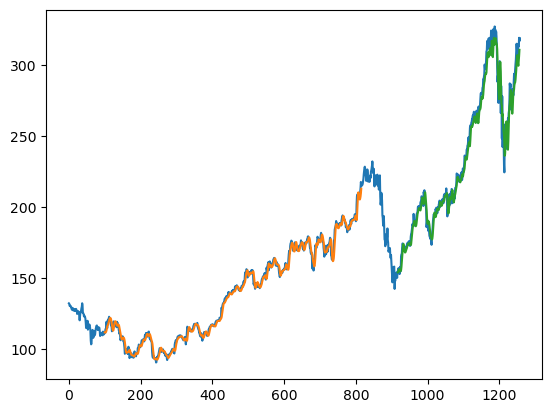

In [73]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

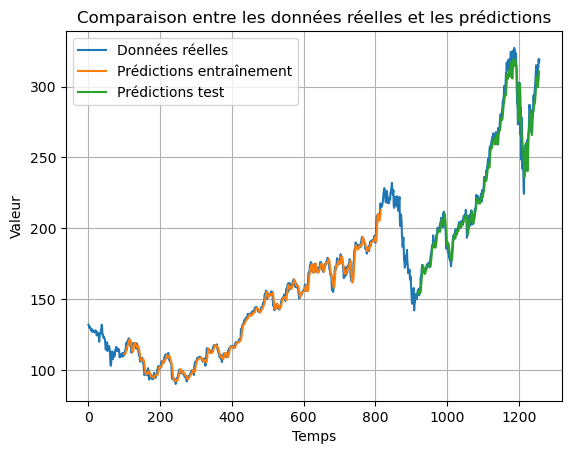

In [75]:
import numpy as np
import matplotlib.pyplot as plt

# Initialisation des prédictions d'entraînement avec un décalage
look_back = 100
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict

# Initialisation des prédictions de test avec un décalage
testPredictPlot = np.empty_like(df1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict

# Plot des données réelles et des prédictions
plt.plot(scaler.inverse_transform(df1), label='Données réelles')
plt.plot(trainPredictPlot, label='Prédictions entraînement')
plt.plot(testPredictPlot, label='Prédictions test')

# Ajouter une légende et personnaliser le graphique
plt.xlabel('Temps')  # Ajouter un label à l'axe des x
plt.ylabel('Valeur')  # Ajouter un label à l'axe des y
plt.title('Comparaison entre les données réelles et les prédictions')  # Titre du graphique
plt.legend()  # Afficher la légende
plt.grid(True)  # Ajouter une grille pour mieux lire les données

# Afficher le graphique
plt.show()
